## New York Times Covid-19 data (Github) 

This demonstrates one of the most useful features of `pd.read_csv`.  It can be given
a URl as an argument.

So Published data sets like this one:

**Data from The New York Times, based on reports from state and local health agencies**

are easily accessed. Read about this data set at [the Github site.](https://github.com/nytimes/covid-19-data)



In [4]:
import pandas as pd
from datetime import datetime


def geoid2code(geoid):
    return int(geoid[4:])

# this data set has cumulative stats
nyt_covid_cumulative = 'https://raw.githubusercontent.com/nytimes/'\
                        'covid-19-data/master/us-counties.csv'
nyt_covid_cumulative_2023  = 'https://raw.githubusercontent.com/nytimes/'\
                        'covid-19-data/master/us-counties-2023.csv'
nyt_covid_rolling_avg = 'https://raw.githubusercontent.com/nytimes/'\
                        'covid-19-data/master/rolling-averages/us-counties.csv'
nyt_covid_rolling_avg_2023 = 'https://raw.githubusercontent.com/nytimes/'\
                        'covid-19-data/master/rolling-averages/us-counties-2023.csv'
#df = pd.read_csv(nyt_covid_rolling_avg,converters=dict(geoid=geoid2code))
df = pd.read_csv(nyt_covid_rolling_avg_2023,converters=dict(geoid=geoid2code))
df.rename(columns={'geoid': 'GEOID'},inplace=True)

start, end = datetime.fromisoformat(df['date'].min()),\
               datetime.fromisoformat(df['date'].max())

In [5]:
df

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2023-01-01,72999,Unknown,Puerto Rico,0,32.14,NaN,0,0.00,NaN
1,2023-01-01,72153,Yauco,Puerto Rico,0,14.00,41.35,0,0.00,0.00
2,2023-01-01,72151,Yabucoa,Puerto Rico,0,11.71,36.43,0,0.00,0.00
3,2023-01-01,72149,Villalba,Puerto Rico,0,7.29,33.92,0,0.00,0.00
4,2023-01-01,72147,Vieques,Puerto Rico,0,0.57,6.83,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
267124,2023-03-23,69110,Saipan,Northern Mariana Islands,0,0.00,0.00,0,0.00,0.00
267125,2023-03-23,69100,Rota,Northern Mariana Islands,0,0.00,0.00,0,0.00,0.00
267126,2023-03-23,78030,St. Thomas,Virgin Islands,0,1.50,2.91,0,0.00,0.00
267127,2023-03-23,78020,St. John,Virgin Islands,0,0.71,17.13,0,0.00,0.00


In [6]:
type(df['GEOID'].values[0])

numpy.int64

I grew up in Cook County.  It is where Chicago is.

In [7]:
df[df['county']=='Cook']

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
1906,2023-01-01,27031,Cook,Minnesota,0,0.43,7.84,0,0.03,0.61
2634,2023-01-01,17031,Cook,Illinois,0,871.57,16.92,0,2.97,0.06
2823,2023-01-01,13075,Cook,Georgia,0,2.43,14.06,0,0.00,0.00
5166,2023-01-02,27031,Cook,Minnesota,0,0.43,7.84,0,0.03,0.61
5894,2023-01-02,17031,Cook,Illinois,0,871.57,16.92,0,2.97,0.06
...,...,...,...,...,...,...,...,...,...,...
263250,2023-03-22,17031,Cook,Illinois,0,533.57,10.36,0,2.91,0.06
263439,2023-03-22,13075,Cook,Georgia,5,0.71,4.14,0,0.06,0.33
265778,2023-03-23,27031,Cook,Minnesota,3,0.43,7.84,0,0.00,0.00
266505,2023-03-23,17031,Cook,Illinois,3486,498.00,9.67,14,2.60,0.05


Oops, it looks like there are some other Cook Counties!

In [8]:
df2 = df[(df['county']=='Cook') & (df['state']=='Illinois')]
df2

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
2634,2023-01-01,17031,Cook,Illinois,0,871.57,16.92,0,2.97,0.06
5894,2023-01-02,17031,Cook,Illinois,0,871.57,16.92,0,2.97,0.06
9154,2023-01-03,17031,Cook,Illinois,1556,724.71,14.07,5,2.72,0.05
12413,2023-01-04,17031,Cook,Illinois,0,724.71,14.07,0,2.72,0.05
15672,2023-01-05,17031,Cook,Illinois,2673,783.14,15.21,0,2.72,0.05
...,...,...,...,...,...,...,...,...,...,...
253483,2023-03-19,17031,Cook,Illinois,0,533.57,10.36,0,2.91,0.06
256739,2023-03-20,17031,Cook,Illinois,0,533.57,10.36,0,2.91,0.06
259995,2023-03-21,17031,Cook,Illinois,0,533.57,10.36,0,2.91,0.06
263250,2023-03-22,17031,Cook,Illinois,0,533.57,10.36,0,2.91,0.06


In [9]:
cty,state = "San Diego","California"
this_df = df[(df['county']== cty) & (df['state']==state)]
#counties = df[(df['state']==state)]['county'].values
#set(counties)
this_df

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
3028,2023-01-01,6073,San Diego,California,0,756.57,22.66,0,0.91,0.03
6288,2023-01-02,6073,San Diego,California,0,756.57,22.66,0,0.91,0.03
9548,2023-01-03,6073,San Diego,California,0,756.57,22.66,0,0.91,0.03
12807,2023-01-04,6073,San Diego,California,0,756.57,22.66,56,1.49,0.04
16066,2023-01-05,6073,San Diego,California,5937,848.14,25.41,0,1.49,0.04
...,...,...,...,...,...,...,...,...,...,...
253877,2023-03-19,6073,San Diego,California,0,221.14,6.62,0,2.53,0.08
257133,2023-03-20,6073,San Diego,California,0,221.14,6.62,0,2.53,0.08
260389,2023-03-21,6073,San Diego,California,0,221.14,6.62,0,2.53,0.08
263644,2023-03-22,6073,San Diego,California,0,221.14,6.62,0,2.53,0.08


In [11]:
cty,state = "New York City","New York"
this_df = df[(df['county']== cty) & (df['state']==state)]
#counties = df[(df['state']==state)]['county'].values
#set(counties)
this_df

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
1342,2023-01-01,36998,New York City,New York,0,3044.57,36.52,0,22.13,0.27
4602,2023-01-02,36998,New York City,New York,0,3044.57,36.52,0,22.13,0.27
7862,2023-01-03,36998,New York City,New York,12878,3151.57,37.80,55,21.13,0.25
11121,2023-01-04,36998,New York City,New York,1758,3206.00,38.46,43,23.30,0.28
14380,2023-01-05,36998,New York City,New York,3807,3271.71,39.24,38,23.40,0.28
...,...,...,...,...,...,...,...,...,...,...
252192,2023-03-19,36998,New York City,New York,0,472.00,5.66,0,8.23,0.10
255448,2023-03-20,36998,New York City,New York,326,290.57,3.49,0,8.23,0.10
258704,2023-03-21,36998,New York City,New York,1171,416.57,5.00,-3,8.23,0.10
261960,2023-03-22,36998,New York City,New York,206,407.86,4.89,150,10.90,0.13


In [12]:
cty,state = "Allegheny","Pennsylvania"
this_df = df[(df['county']== cty) & (df['state']==state)]
#counties = df[(df['state']==state)]['county'].values
#set(counties)
this_df

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
983,2023-01-01,42003,Allegheny,Pennsylvania,0,135.00,11.10,0,1.71,0.14
4243,2023-01-02,42003,Allegheny,Pennsylvania,0,135.00,11.10,0,1.71,0.14
7503,2023-01-03,42003,Allegheny,Pennsylvania,0,135.00,11.10,0,1.71,0.14
10762,2023-01-04,42003,Allegheny,Pennsylvania,1227,175.29,14.41,17,1.94,0.16
14021,2023-01-05,42003,Allegheny,Pennsylvania,0,175.29,14.41,0,1.94,0.16
...,...,...,...,...,...,...,...,...,...,...
251833,2023-03-19,42003,Allegheny,Pennsylvania,0,98.29,8.08,0,1.71,0.14
255089,2023-03-20,42003,Allegheny,Pennsylvania,0,98.29,8.08,0,1.71,0.14
258345,2023-03-21,42003,Allegheny,Pennsylvania,0,98.29,8.08,0,1.71,0.14
261601,2023-03-22,42003,Allegheny,Pennsylvania,514,73.43,6.04,11,1.51,0.12


### Six cities

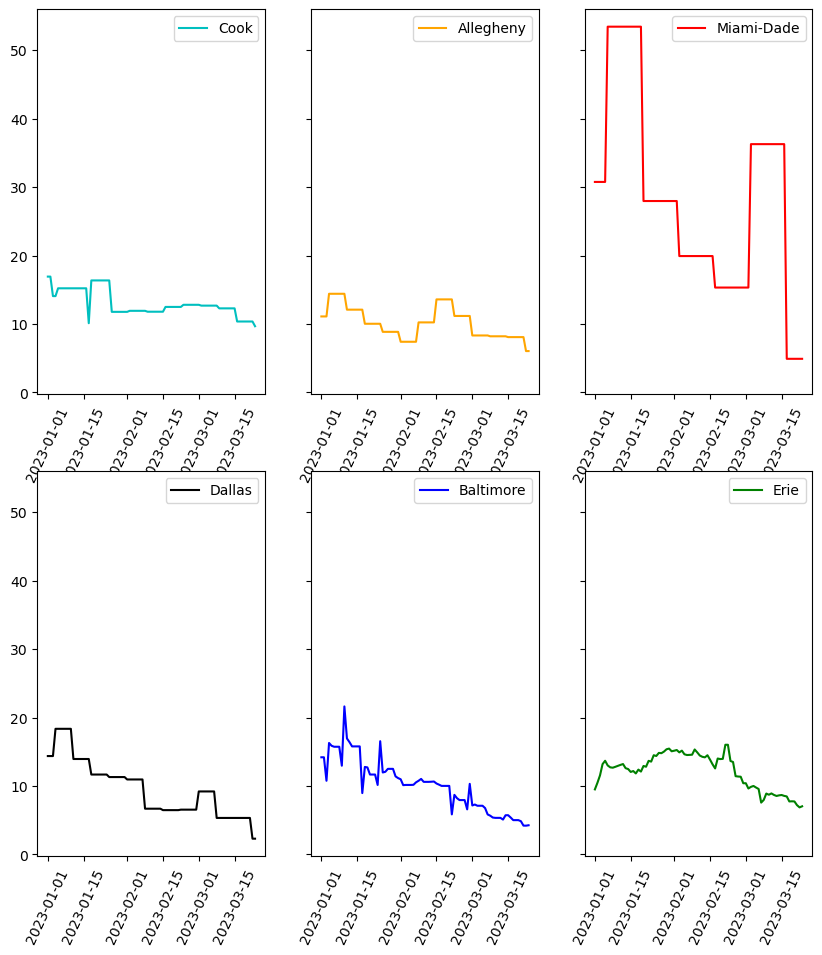

In [14]:
import numpy as np
import matplotlib.pylab as plt
import datetime

counties = np.array([[('Cook','Illinois'),
                      ('Allegheny','Pennsylvania'),
                     ('Miami-Dade','Florida')],
                      [('Dallas','Texas'),
                       ('Baltimore','Maryland'),
                        ('Erie',"New York")  
                      ]]
                   )
colors = np.array([['c','orange','red'],
                       ['k','b', 'g']])  

def plot_counties_data (counties,color=colors,figsize=(10,11),
                        data_col='cases_avg'):
    rows,cols,atts = counties.shape
    fig, axes = plt.subplots(rows,cols,sharey=True,figsize=figsize)
    if axes.ndim == 1:
        # make sure this is a 2D array
        axes = axes[np.newaxis,:]
    for r in range(rows):
        for c in range(cols):
            cty,state = counties[r,c]
            this_df = df[(df['county']== cty) & (df['state']==state)]
            times = np.array([datetime.date.fromisoformat(d) 
                              for d in this_df.date])
            plt.axes(axes[r,c])
            l, = plt.plot(times,this_df[data_col], label=cty)
            l.set_color(colors[r,c])
            plt.xticks(rotation=65)
            plt.legend()

plot_counties_data(counties,data_col='cases_avg_per_100k')

Validating the display vals for Cook county

In [21]:
import datetime
num_ticks = 10
inc = (end-start)/num_ticks
xvals2 = [datetime.date.fromisoformat(dt) for dt in df2.date]
xticks = [start + (i*inc) for i in range(num_ticks)]
# We're done doing date arithmetic, now strings
xticklabels = [xt.date().isoformat() for xt in xticks]
f = lambda d: df2[df2['date'] == d]['cases_avg_per_100k'].values
vals = [(i,f(d)[0]) for (i,d) in enumerate(xticklabels) if len(f(d)) > 0]
for (i,v) in  vals:
    print(f'{xticklabels[i]} {v:5.3f}')

2020-03-22 2.020
2020-05-23 25.530
2020-07-24 10.070
2020-09-23 12.140
2020-11-24 75.230
2021-01-25 32.440
2021-03-27 17.660
2021-05-28 8.360
2021-07-29 7.700


Using some of the code above for a simple display of `df2`.

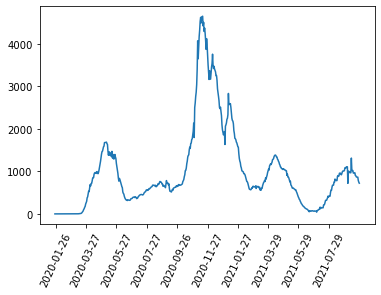

In [177]:
plt.plot(xvals2,df2.cases_avg)
ax = plt.gca()
ax.set_xticks(xticklabels)
val = plt.xticks(rotation=65)

### Some big cities

With shared y-axis, it's helpful to display the big cities
separate from the others.

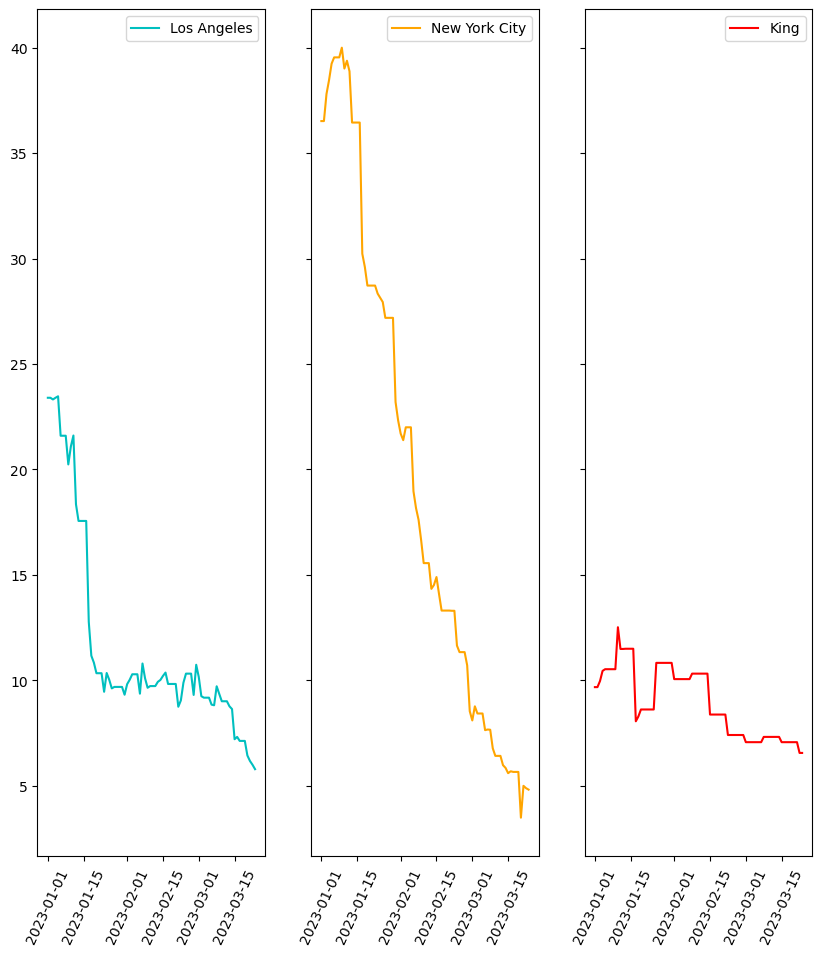

In [15]:
colors2 = colors[1,:][np.newaxis,:]
counties2 = np.array([[('Los Angeles','California'),
             ('New York City','New York'),
            ('King','Washington')]])
plot_counties_data (counties2,data_col='cases_avg_per_100k')

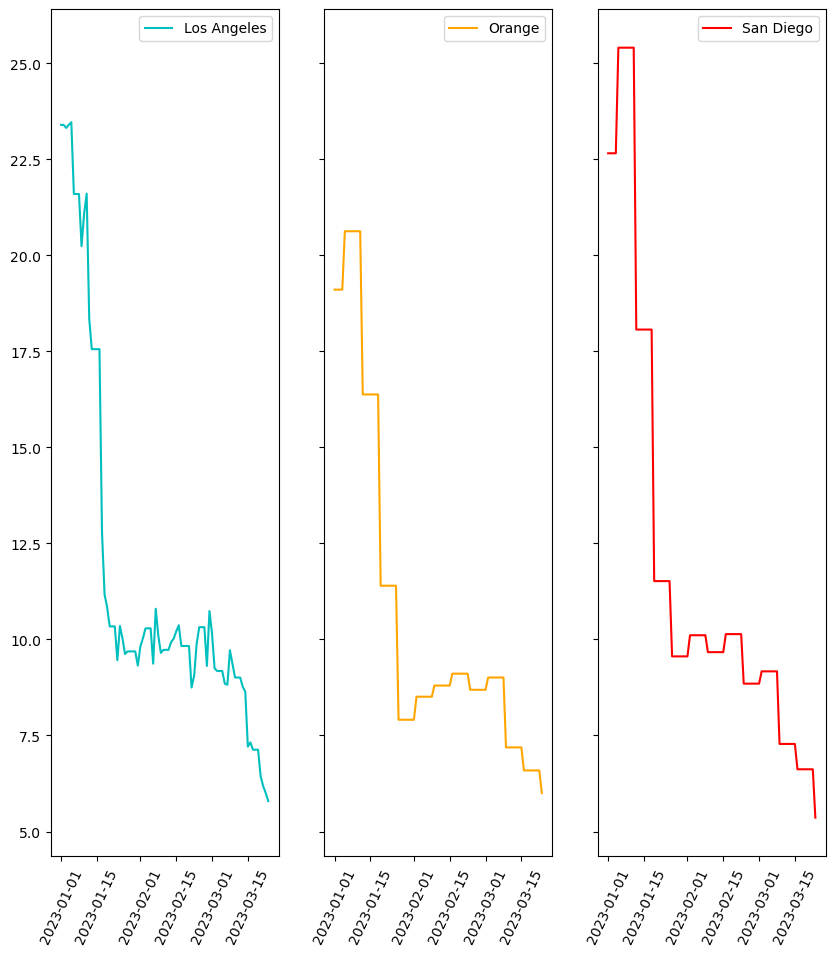

In [16]:
colors2 = colors[1,:][np.newaxis,:]
counties2 = np.array([[('Los Angeles','California'),
                       ('Orange','California'),
                       ('San Diego','California'),
             ]])
plot_counties_data (counties2,data_col='cases_avg_per_100k')

### Using Seaborn

I found it easy to use seaborn for the eays case, and difficult
to extend it to the multiplot case.  This was because I found it 
hard to tweak the date display on the x-axis when it was a multiple plot.

Your mileage may vary.

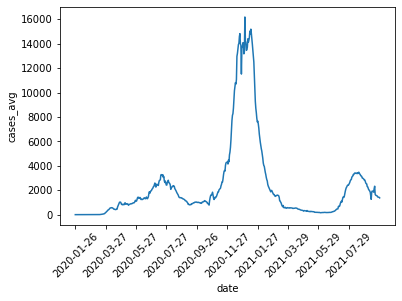

In [45]:
g = sns.lineplot(x='date', y='cases_avg', data=df_toplot)
g.set_xticks(xticklabels)
xts = plt.xticks(rotation=45)

### Adding Lat Longs to the data

The Geographical info is stored in a column named GEOID (we uppercased the name
on loading, for reasons that will become clear below).

In [89]:
df[:5]

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,53061,Snohomish,Washington,1,0.14,0.02,0,0.0,0.0
1,2020-01-22,53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
2,2020-01-23,53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
3,2020-01-24,53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
4,2020-01-24,17031,Cook,Illinois,1,0.14,0.00,0,0.0,0.0


The GEOID column contains FIPS geographical codes that we can use to make maps
from the the data.

Problem is the programs we will use for that purpose want 
lat/long coordinates.

Solution: we got to the census.gov site and get mappings from geocodes
to lat/longs.  We turn this new data into a pandas DataFrame.  We then join
the new DataFrame to our old one.

In [6]:

#Normally you'd get this data heree from a compressed file.
true_url = 'https://www2.census.gov/geo/docs/maps-data/data/gazetteer/2021_Gazetteer/'\
      '2021_Gaz_counties_national.zip'
# To simplify things Ive copied it here, uncompressed,
url = 'https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/_static/'\
      '2021_Gaz_counties_national.txt'
# The file uses tabs, not "," as a separator.  `pd.read_csv` still works if you 
# tell it that.
codes = pd.read_csv(url,sep='\t')
# last column name misparsed, many spaces added.  data cleanup
long = codes.columns[-1]
codes.rename(columns={long: long.strip()},inplace=True)
#Make the subtable we're going to join to.
geoid_lat_long = codes[['GEOID','INTPTLAT','INTPTLONG']]

In [7]:
codes[:5]

,USPS,GEOID,ANSICODE,NAME,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,AL,1001,161526,Autauga County,1539634184,25674812,594.456,9.913,32.532237,-86.646440
1,AL,1003,161527,Baldwin County,4117656514,1132955729,1589.836,437.437,30.659218,-87.746067
2,AL,1005,161528,Barbour County,2292160149,50523213,885.008,19.507,31.870253,-85.405104
3,AL,1007,161529,Bibb County,1612188717,9572303,622.470,3.696,33.015893,-87.127148
4,AL,1009,161530,Blount County,1670259090,14860281,644.891,5.738,33.977358,-86.566440


In [11]:
codes[(codes['NAME']=='King County')&(codes['USPS']=='WA')]

,USPS,GEOID,ANSICODE,NAME,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
2970,WA,53033,1531933,King County,5479337396,496938967,2115.584,191.869,47.490552,-121.833977


In [12]:
codes[(codes['GEOID']==53033)]

,USPS,GEOID,ANSICODE,NAME,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
2970,WA,53033,1531933,King County,5479337396,496938967,2115.584,191.869,47.490552,-121.833977


## The problem of NYC

The NYT data creates this fictional county called "New York City" and gives
it a reasonable GEOID which can theoretically be translated to a Lat Long.

One problem is that that GEOID does not exist in our 
`Codes` data. Another problems is that
later on we'd like to relate the NYC Covid numbers to shape files
for map drawing,
and the shape files will generally be linked to official counties.
There will be no shape file for this  agglomeration
of 5 counties called "New York City".

In [130]:
st = 'NY'
# Staten Island = Richmond, Brooklyn = Kings County,
# Manhattan = New York County
cty_list = ['Queens County','Bronx County','Richmond County',
            'Kings County','New York County']

def get_data_for_county_list (cty_list, st):
    return codes[(codes['NAME'].isin(cty_list))&(codes['USPS']==st)]

get_data_for_county_list (cty_list,'NY')

,USPS,GEOID,ANSICODE,NAME,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
1831,NY,36005,974101,Bronx County,109233466,39353304,42.175,15.194,40.848711,-73.852939
1852,NY,36047,974122,Kings County,179684484,71158757,69.377,27.475,40.635045,-73.950640
1859,NY,36061,974129,New York County,58683562,29010735,22.658,11.201,40.776642,-73.970187
1869,NY,36081,974139,Queens County,281594049,188444349,108.724,72.759,40.654658,-73.841209
1871,NY,36085,974141,Richmond County,148982680,117441533,57.523,45.344,40.561263,-74.139900


We verify NYC's GEOID in the NYT data as follows

In [75]:
geoid = 36998
df[df['GEOID']==geoid][:5]

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
406,2020-03-01,36998,New York City,New York,1,0.14,0.00,0,0.0,0.0
434,2020-03-02,36998,New York City,New York,0,0.14,0.00,0,0.0,0.0
468,2020-03-03,36998,New York City,New York,1,0.29,0.00,0,0.0,0.0
505,2020-03-04,36998,New York City,New York,0,0.29,0.00,0,0.0,0.0
546,2020-03-05,36998,New York City,New York,2,0.57,0.01,0,0.0,0.0


But of course it's not in the codes data

In [77]:
#gid = 53033
gid = 36998 # NYC
codes[(codes['GEOID']==gid)]

,USPS,GEOID,ANSICODE,NAME,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG


We return to this problem below.

The flip side of this issue.  

The Covid data `df` has no data for any of the five burroughs of New York.
What has happened is that all that data has been aggregated into the 'New York City'
rows.

The problem with that is that each of the burroughs is administratively a county and
geographical resources (like the codes data or shapefiles for counties) 
will consistently link their data to county names.

The bottom line is that this special case treatment of
NYC is a real headache.

In [131]:
df[(df['county'].isin(cty_list))&(df['state']=='New York')]

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k


#### Interpolating the missing burrough data 

Solution to the problem of the missing Covid stats for the 5 burroughs.
For each burrough do the following.

  1. Create a `sub_df`, a data frame copy for only the NYC part the Covid dats
  2. Rename the County and geoid of `sub_df` to be burrough, burrough_geoid  
  3. Adjoin the `subdf` to `df` with `pd.concat`.
    
Known bug: arguable interpolation for "average" cols; false for cumulative/cases cols.

In [186]:
county,st = 'Bronx County','NY'
burrough_geoid = codes[(codes['NAME'] == county) &
                        (codes['USPS'] == 'NY')]['GEOID'].values[0]
nyc_geoid = 36998

def get_cty_geoid (county,st):
    return codes[(codes['NAME'] == county) &
                        (codes['USPS'] == 'NY')]['GEOID'].values[0]

def add_interpolate_cty_info (df, county_list, base_cty_geoid, st):
    """
    Create data frame copy for only the  NYC data.
    Rename County/geoid  to be burrough, burrough_geoid  
    Adjoin to `df` with `pd.concat`.
    Known bug: arguable interpolation for "average" cols; 
    false for cumulative/cases cols.
    """
    df_list = [df]
    for county in county_list:
        sub_df = df[df['GEOID']==base_cty_geoid].copy()
        sub_df.loc[sub_df['GEOID']== base_cty_geoid,'county'] = county
        # Gotta do this update last, since GEOID is our hook for doing updates
        burrough_geoid = get_cty_geoid (county,st)
        sub_df.loc[sub_df['GEOID'] == base_cty_geoid,'GEOID'] = burrough_geoid
        df_list.append(sub_df)
    df_plus_interps = pd.concat(df_list,ignore_index=True)
    return df_plus_interps 
 
# Interpolate!
df_plus_interps = add_interpolate_cty_info (df, cty_list, nyc_geoid, st=st)

# Check by county name
df_plus_interps[df_plus_interps['county']==county]
# Check by burrough_geoid
#df_plus_interps[df_plus_interps['GEOID']==burrough_geoid]

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
1774782,2020-03-01,36005,Bronx County,New York,1,0.14,0.00,0,0.00,0.00
1774783,2020-03-02,36005,Bronx County,New York,0,0.14,0.00,0,0.00,0.00
1774784,2020-03-03,36005,Bronx County,New York,1,0.29,0.00,0,0.00,0.00
1774785,2020-03-04,36005,Bronx County,New York,0,0.29,0.00,0,0.00,0.00
1774786,2020-03-05,36005,Bronx County,New York,2,0.57,0.01,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
1775355,2021-09-25,36005,Bronx County,New York,0,1786.86,21.43,0,14.00,0.17
1775356,2021-09-26,36005,Bronx County,New York,3825,1732.71,20.78,30,16.29,0.20
1775357,2021-09-27,36005,Bronx County,New York,0,1505.00,18.05,0,16.00,0.19
1775358,2021-09-28,36005,Bronx County,New York,2527,1620.29,19.44,22,15.14,0.18


Check right number of rows added.  5 burroughs times number of NYC rows in original
df (= 578).

In [181]:
(len(df_plus_interps) - len(df))/5

578.0

Check original data ok.

In [175]:
df_plus_interps.loc[df_plus_interps['county']=='New York City']

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
406,2020-03-01,36998,New York City,New York,1,0.14,0.00,0,0.00,0.00
434,2020-03-02,36998,New York City,New York,0,0.14,0.00,0,0.00,0.00
468,2020-03-03,36998,New York City,New York,1,0.29,0.00,0,0.00,0.00
505,2020-03-04,36998,New York City,New York,0,0.29,0.00,0,0.00,0.00
546,2020-03-05,36998,New York City,New York,2,0.57,0.01,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
1759302,2021-09-25,36998,New York City,New York,0,1786.86,21.43,0,14.00,0.17
1762550,2021-09-26,36998,New York City,New York,3825,1732.71,20.78,30,16.29,0.20
1765798,2021-09-27,36998,New York City,New York,0,1505.00,18.05,0,16.00,0.19
1769046,2021-09-28,36998,New York City,New York,2527,1620.29,19.44,22,15.14,0.18


### Doing the join

In this section we explain the  **join** operation that we'll use to merge
the lat-long info in the codes table with the Covid data.

In [8]:
#geoid_lat_long = codes[['GEOID','INTPTLAT','INTPTLONG']]
geoid_lat_long[:5]

,GEOID,INTPTLAT,INTPTLONG
0,1001,32.532237,-86.646440
1,1003,30.659218,-87.746067
2,1005,31.870253,-85.405104
3,1007,33.015893,-87.127148
4,1009,33.977358,-86.566440


In [9]:
geoid_lat_long.set_index('GEOID')[:5]

,INTPTLAT,INTPTLONG
GEOID,,
1001,32.532237,-86.646440
1003,30.659218,-87.746067
1005,31.870253,-85.405104
1007,33.015893,-87.127148
1009,33.977358,-86.566440


So here are some rows that all share a single GEOID.  We'd like to link all these
rows to the same Lat/Ling info in `codes`.

In [10]:
df[:5]

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,53061,Snohomish,Washington,1,0.14,0.02,0,0.0,0.0
1,2020-01-22,53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
2,2020-01-23,53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
3,2020-01-24,53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
4,2020-01-24,17031,Cook,Illinois,1,0.14,0.00,0,0.0,0.0


Here is the join operation.

In [11]:
new_df = df.join(geoid_lat_long.set_index('GEOID'),on='GEOID')
#new_df = df_plus_interps.join(geoid_lat_long.set_index('GEOID'),on='GEOID')

And it worked.

In [12]:
new_df

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,INTPTLAT,INTPTLONG
0,2020-01-21,53061,Snohomish,Washington,1,0.14,0.02,0,0.00,0.00,48.054913,-121.765038
1,2020-01-22,53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00,48.054913,-121.765038
2,2020-01-23,53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00,48.054913,-121.765038
3,2020-01-24,53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00,48.054913,-121.765038
4,2020-01-24,17031,Cook,Illinois,1,0.14,0.00,0,0.00,0.00,41.894294,-87.645455
...,...,...,...,...,...,...,...,...,...,...,...,...
1774199,2021-09-29,69120,Tinian,Northern Mariana Islands,0,0.00,0.00,0,0.00,0.00,NaN,NaN
1774200,2021-09-29,69110,Saipan,Northern Mariana Islands,0,0.43,0.89,0,0.00,0.00,NaN,NaN
1774201,2021-09-29,78030,St. Thomas,Virgin Islands,7,5.00,9.68,1,0.14,0.28,NaN,NaN
1774202,2021-09-29,78020,St. John,Virgin Islands,0,0.86,20.55,0,0.00,0.00,NaN,NaN


In [123]:
len(df), len(new_df)

(1774204, 1774204)

No new rows were created.  All the rows in the original Covid data table were preserved,
meaning that some counties like St. Croix in the Virgin Islands (seen above in the last row) receive Nan values in the lat/long columns.

So what happened to NYC, the place with a geoid that does not occur in the `codes` 
DataFrame? 

It is treated like St. Croix, as we see below.

#### Covid data present, missing lat long

In [198]:
geoid = 36998
new_df[new_df['GEOID']==geoid]

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,INTPTLAT,INTPTLONG
406,2020-03-01,36998,New York City,New York,1,0.14,0.00,0,0.00,0.00,NaN,NaN
434,2020-03-02,36998,New York City,New York,0,0.14,0.00,0,0.00,0.00,NaN,NaN
468,2020-03-03,36998,New York City,New York,1,0.29,0.00,0,0.00,0.00,NaN,NaN
505,2020-03-04,36998,New York City,New York,0,0.29,0.00,0,0.00,0.00,NaN,NaN
546,2020-03-05,36998,New York City,New York,2,0.57,0.01,0,0.00,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1759302,2021-09-25,36998,New York City,New York,0,1786.86,21.43,0,14.00,0.17,NaN,NaN
1762550,2021-09-26,36998,New York City,New York,3825,1732.71,20.78,30,16.29,0.20,NaN,NaN
1765798,2021-09-27,36998,New York City,New York,0,1505.00,18.05,0,16.00,0.19,NaN,NaN
1769046,2021-09-28,36998,New York City,New York,2527,1620.29,19.44,22,15.14,0.18,NaN,NaN


We have `NaN` values for lat/long.

There are no rows with geoid 36998 in the `CODES` table, so when we do the
join, those rows from the Covid data have no lat/long values.

For map drawing purposes, let's provisionally assign these rows the Lat Long of New York County (= Manhattan).

In [199]:
st = 'NY'
cty = 'New York County'
geoid = 36998

lat_val = codes[(codes['NAME'] == cty) &(codes['USPS']==st)]['INTPTLAT'].values[0]
long_val = codes[(codes['NAME'] == cty) &(codes['USPS']==st)]['INTPTLONG'].values[0]#,'INTPTLONG']]

# From 
# https://stackoverflow.com/questions/49161120/\
#    pandas-python-set-value-of-one-column-based-on-value-in-another-column
#Method 1: df['c1'].loc[df['c1'] == 'Value'] = 10
# or:
#Method 2: df.loc[df['c1'] == 'Value', 'c1'] = 10

# Method1 Infamous SettingWithCopyWarning generated.  But it seems to work!
#new_df['INTPTLAT'].loc[new_df['GEOID']==geoid] = lat_val
#new_df['INTPTLONG'].loc[new_df['GEOID']==geoid] = long_val

# Method 2 No warning!  Works!
new_df.loc[new_df['GEOID']==geoid,'INTPTLAT'] = lat_val
new_df.loc[new_df['GEOID']==geoid,'INTPTLONG'] = long_val

new_df.loc[new_df['GEOID']==geoid]


,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,INTPTLAT,INTPTLONG
406,2020-03-01,36998,New York City,New York,1,0.14,0.00,0,0.00,0.00,40.776642,-73.970187
434,2020-03-02,36998,New York City,New York,0,0.14,0.00,0,0.00,0.00,40.776642,-73.970187
468,2020-03-03,36998,New York City,New York,1,0.29,0.00,0,0.00,0.00,40.776642,-73.970187
505,2020-03-04,36998,New York City,New York,0,0.29,0.00,0,0.00,0.00,40.776642,-73.970187
546,2020-03-05,36998,New York City,New York,2,0.57,0.01,0,0.00,0.00,40.776642,-73.970187
...,...,...,...,...,...,...,...,...,...,...,...,...
1759302,2021-09-25,36998,New York City,New York,0,1786.86,21.43,0,14.00,0.17,40.776642,-73.970187
1762550,2021-09-26,36998,New York City,New York,3825,1732.71,20.78,30,16.29,0.20,40.776642,-73.970187
1765798,2021-09-27,36998,New York City,New York,0,1505.00,18.05,0,16.00,0.19,40.776642,-73.970187
1769046,2021-09-28,36998,New York City,New York,2527,1620.29,19.44,22,15.14,0.18,40.776642,-73.970187


In [194]:
len(new_df)

1774204

#### Counties with no Covid stats;  why an outer join doesnt help

As might be expected, in the original
df, counties with no Covid stats could't join to our Covid data
and were simply omitted, as they were in the original `df`.

When the join was done on the df with interpolation, we
got the lat long info we wanted.

In [203]:

# Staten Island = Richmond, Brooklyn = Kings County,
# Manhattan = New York County
cty_list = ['Queens County','Bronx County','Richmond County',
            'Kings County','New York County']

#new_df[(new_df['county'].isin(cty_list))&(new_df['state']=='New York')]
new_df[(new_df['county'] == 'Bronx County')&(new_df['state']=='New York')]

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,INTPTLAT,INTPTLONG
1774782,2020-03-01,36005,Bronx County,New York,1,0.14,0.00,0,0.00,0.00,40.848711,-73.852939
1774783,2020-03-02,36005,Bronx County,New York,0,0.14,0.00,0,0.00,0.00,40.848711,-73.852939
1774784,2020-03-03,36005,Bronx County,New York,1,0.29,0.00,0,0.00,0.00,40.848711,-73.852939
1774785,2020-03-04,36005,Bronx County,New York,0,0.29,0.00,0,0.00,0.00,40.848711,-73.852939
1774786,2020-03-05,36005,Bronx County,New York,2,0.57,0.01,0,0.00,0.00,40.848711,-73.852939
...,...,...,...,...,...,...,...,...,...,...,...,...
1775355,2021-09-25,36005,Bronx County,New York,0,1786.86,21.43,0,14.00,0.17,40.848711,-73.852939
1775356,2021-09-26,36005,Bronx County,New York,3825,1732.71,20.78,30,16.29,0.20,40.848711,-73.852939
1775357,2021-09-27,36005,Bronx County,New York,0,1505.00,18.05,0,16.00,0.19,40.848711,-73.852939
1775358,2021-09-28,36005,Bronx County,New York,2527,1620.29,19.44,22,15.14,0.18,40.848711,-73.852939


In [204]:
new_df[(new_df['county'] == 'Queens County')&(new_df['state']=='New York')]

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,INTPTLAT,INTPTLONG
1774204,2020-03-01,36081,Queens County,New York,1,0.14,0.00,0,0.00,0.00,40.654658,-73.841209
1774205,2020-03-02,36081,Queens County,New York,0,0.14,0.00,0,0.00,0.00,40.654658,-73.841209
1774206,2020-03-03,36081,Queens County,New York,1,0.29,0.00,0,0.00,0.00,40.654658,-73.841209
1774207,2020-03-04,36081,Queens County,New York,0,0.29,0.00,0,0.00,0.00,40.654658,-73.841209
1774208,2020-03-05,36081,Queens County,New York,2,0.57,0.01,0,0.00,0.00,40.654658,-73.841209
...,...,...,...,...,...,...,...,...,...,...,...,...
1774777,2021-09-25,36081,Queens County,New York,0,1786.86,21.43,0,14.00,0.17,40.654658,-73.841209
1774778,2021-09-26,36081,Queens County,New York,3825,1732.71,20.78,30,16.29,0.20,40.654658,-73.841209
1774779,2021-09-27,36081,Queens County,New York,0,1505.00,18.05,0,16.00,0.19,40.654658,-73.841209
1774780,2021-09-28,36081,Queens County,New York,2527,1620.29,19.44,22,15.14,0.18,40.654658,-73.841209


An outer join would have created rows for these counties, but they would lack 
Covid data.

In [143]:
# Pandas cpomment: This had no effect
# new_df2 = df.join(geoid_lat_long.set_index('GEOID'),on='GEOID',how='outer')
# Do outer merge instead.
new_df2 = pd.merge(left=df, right=codes, on="GEOID", how="outer")

In [144]:
len(df),len(new_df2)

(1774204, 1774215)

11 new rows.  NYC accounts for 5 of them.

In [148]:
new_df2[(new_df2['NAME'].isin(cty_list))&(new_df2['USPS']=='NY')]

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,USPS,ANSICODE,NAME,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
1774210,NaN,36005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,974101.0,Bronx County,109233466.0,39353304.0,42.175,15.194,40.848711,-73.852939
1774211,NaN,36047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,974122.0,Kings County,179684484.0,71158757.0,69.377,27.475,40.635045,-73.950640
1774212,NaN,36061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,974129.0,New York County,58683562.0,29010735.0,22.658,11.201,40.776642,-73.970187
1774213,NaN,36081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,974139.0,Queens County,281594049.0,188444349.0,108.724,72.759,40.654658,-73.841209
1774214,NaN,36085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,974141.0,Richmond County,148982680.0,117441533.0,57.523,45.344,40.561263,-74.139900


There are several problems in using an outer join and trying to fill the
missing covid in using an approach similar to what we 
did in adding lat longs to "NYC" county.

  1.  Join the complete tables 
      has created redundant `county` and `NAME` columns.  Renaming 
      one of them wouldnt result in merging the columns in the join,
      even if they were identical, unless
      we made the `county` the column joined on, which we don't want.
      Easily fixable by creating a version of codes without the redundant col.
      
  2. The df `new_df2` has exactly 5 NYC rows, one for each burrough.
      We ultimately want many rows per burrough,
      one for each date.  Nut it's not very clear what data to put in these rows, even
      if we knew how to create them.
      
Bottom line.  The outer join is of little use.  What we needed was interpolation: adding
data to the Covid data table `df` before the join.

#### Drop NaNs

The places we have no lat long info for are also places that are a bit removed from
the continental US.  They're going to be hard to represent in the same map.

So for map-drawing purposes we don't need to feel bad about omitting them.

In [18]:
new_df.dropna(inplace=True) 

So here's a simple visualization of what we have, which can be improved greatly:

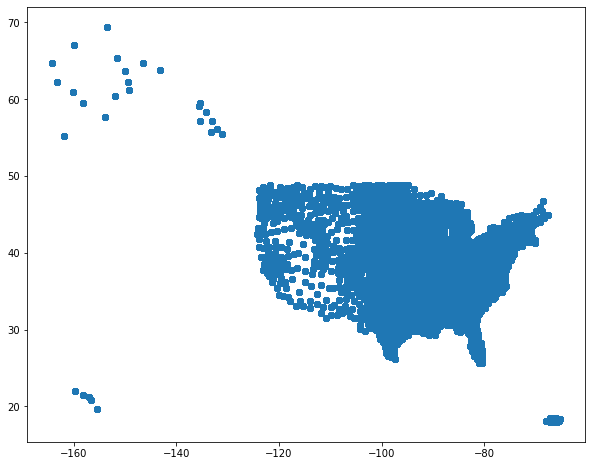

In [13]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10,8))
# Get rid of an outlier
lat_lons = [(long,new_df.INTPTLAT.values[i]) for (i,long) in 
            enumerate(new_df.INTPTLONG.values) if long < 0]
lats,lons = zip(*lat_lons)
plt.scatter(lats,lons)

Hey that looks familiar!

But it's not very informative.  Ok.  A lot of covid.

What can we do to improve this?

See the [geographical visualization notebook.](https://github.com/gawron/python-for-social-science/blob/master/visualization/visualizing_geographic_data.ipynb)